In [31]:
import pandas as pd
import seaborn as sns


In [32]:
data=pd.read_csv("tit_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
data_test=pd.read_csv("tit_test.csv")
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [70]:
da=data_test.fillna(data_test.mean())

In [71]:
da.count()

PassengerId    418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Cabin           91
Embarked       418
dtype: int64

In [41]:
d=data.fillna(data.mean())

In [42]:
d.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

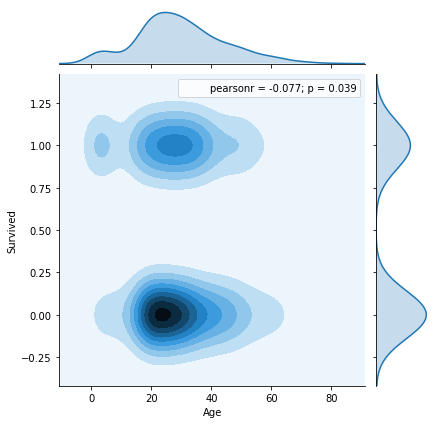

In [10]:
sns.jointplot('Age', 'Survived',  data=data, kind='kde')
#in this graph at survived=0 have more dark 

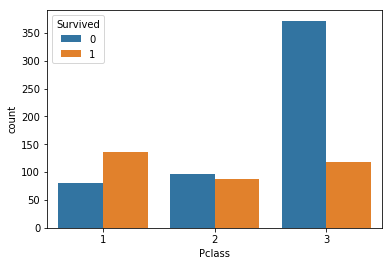

In [22]:
sns.countplot('Pclass',  data=data, hue='Survived')

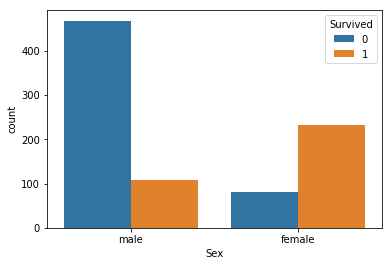

In [15]:
sns.countplot('Sex', data=data, hue='Survived')
# in this graph show that more than 400 male are dead and only around of 100 are suervived  but other side less than 100 female are dead but more than 200 are survived 

In [47]:
x=d[[ 'Age']]
y=d['Survived']

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(801, 1)
(90, 1)
(801,)
(90,)


In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [72]:
pred=knn.predict(da[['Age']])


In [86]:
df=pd.DataFrame({'PassengerId':da['PassengerId'], 'Survived':pred})
df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
5,897,1
6,898,0
7,899,0
8,900,0
9,901,0


In [56]:
import numpy as np
from sklearn import metrics
print('mean absolute error',metrics.mean_absolute_error(y_test,pred))
print('root mean squared error', np.sqrt(metrics.mean_squared_error(y_test,pred)))


mean absolute error 0.4301675977653631
root mean squared error 0.6558716320785365


In [87]:
df.to_csv('example1.csv')